# Notebook pour l'animation des météores



Amélioration 

https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/01-03-Construction-of-an-artificial-but-realistic-image.html


artificial image of Earth from satellites python

https://www.google.com/search?client=safari&rls=en&q=artificial+image+of+Earth+from+satellites+python&ie=UTF-8&oe=UTF-8

building detection from satellite images python code

Image la nuit
https://www.earthdata.nasa.gov/learn/backgrounders/nighttime-lights

artificial image of cities night from satellites python
https://up42.com/blog/introduction-optical-satellite-imagery

earth cities from space NASA (images)
https://eol.jsc.nasa.gov/SearchPhotos/photo.pl?mission=ISS016&roll=E&frame=27162    
For the citation see the website : https://eol.jsc.nasa.gov/FAQ

https://eol.jsc.nasa.gov/FAQ/#cloudMasks



In [1]:
#%matplotlib notebook 

# Importation des modules
import numpy as np
from scipy.integrate import odeint

from matplotlib import pyplot as plt
from matplotlib import animation

import random
from IPython.display import HTML

from PIL import Image






# 1 Animation simple depuis un random

https://stackoverflow.com/questions/17212722/matplotlib-imshow-how-to-animate
http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/


In [2]:
# initialization function: plot the background of each frame
def init():
    im.set_data(np.random.random((5,5)))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    a=im.get_array()
    a=a*np.exp(-0.001*i)    # exponential decay of the values
    im.set_array(a)
    return [im]

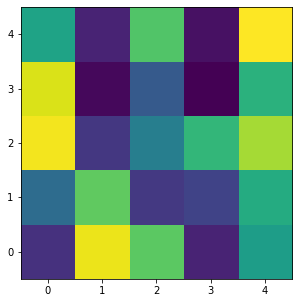

In [3]:
# First set up the figure, the axis, and the plot element we want to animate

fig, ax = plt.subplots(figsize=(5,5))
#ax.set_xlim(0,5)
#ax.set_ylim(0,5)

a=np.random.random((5,5))
im=plt.imshow(a,interpolation='none',origin='lower')

In [4]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True, repeat=False)

HTML(anim.to_html5_video())


In [5]:
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

# 2. Animation mouvement simple un pixel

In [6]:
px_x = 10
px_y = 10


In [7]:
# initialization function: plot the background of each frame
def init():
#    im.set_data(np.zeros(px_x*px_y).reshape(px_x,px_y))
    im.set_data(np.random.random((px_x,px_y)))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    a = im.get_array()
    if i!=0 :
        a[0+(i-1)%px_x : 1+(i-1)%px_y , 
          0+(i-1)%px_x : 1+(i-1)%px_y] = a0 #np.exp(-0.001*i)    # exponential decay of the values

    a[0+i%px_x : 1+i%px_y , 
      0+i%px_x : 1+i%px_y] = a[0:1,0:1]+10 #np.exp(-0.001*i)    # exponential decay of the values
    im.set_array(a)
    return [im]    



In [8]:
10%px_x

0

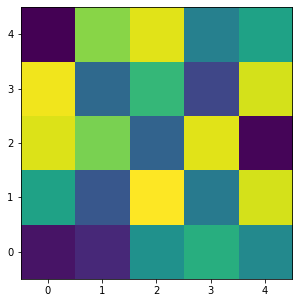

In [9]:
# First set up the figure, the axis, and the plot element we want to animate

fig, ax = plt.subplots(figsize=(5,5))
#ax.set_xlim(0,5)
#ax.set_ylim(0,5)

#a  = init(px_x, px_y)[0].get_array()
#a  = animate(1)[0].get_array()
a  = np.random.random((5,5))
a0 = a[0:1,0:1]
im = plt.imshow(a,interpolation='none',origin='lower')

In [11]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=100, repeat=False, blit=True)

HTML(anim.to_html5_video())



# 3 Animation Fakeor

## 3.1 Fonction Fakeor

In [12]:
px_x = 50
px_y = 50

x0, y0 = int(px_x/2),int(px_y/2)
sig_x, sig_y = 3,3

sig_t = 2
mu = 15

Imax = 255

def fakeor(px_x,px_y, x0,y0, t, a0):
    a   = a0.copy()
    
    at = Imax*np.exp( - (t-mu)**2/(2*sig_t**2) )

    for x in np.arange(px_x):
        for y in np.arange(px_y):
            u = np.sqrt( ( (x-x0)/sig_x )**2 + ( (y-y0)/sig_y )**2)
            a[x,y] = (at-a0[x,y])*np.exp(-u/2)
            
    a_noise = 0
    
    a = a + a_noise + a0
    return a

## 3.2 Image de fond 

In [13]:

#a0  = np.random.random((px_x,px_y))*255
a0  = np.ones((px_x,px_y))*255



In [14]:
img = np.asarray(Image.open('./Pictures/ISS016-E-27162.JPG'))

print(np.shape(img), img.max(), img.min())
px_x = np.shape(img)[0]
px_y = np.shape(img)[1]
a0 = img

lum_img = img[:, :, 0]
#plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')

np.mean(img[:, :, 0])


(436, 639, 3) 255 0


26.77169028441803

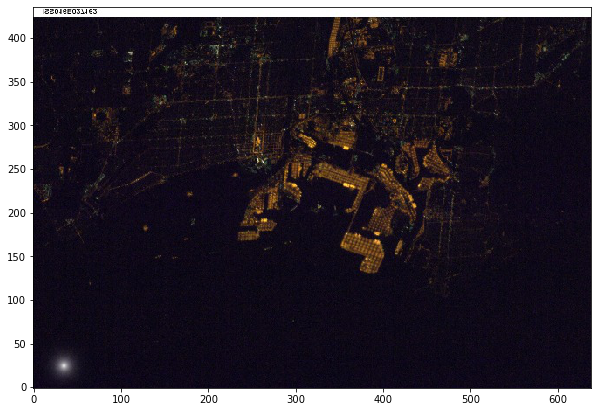

In [15]:
# First set up the figure, the axis, and the plot element we want to animate

fig, ax = plt.subplots(figsize=(10,10))



#imgplot = plt.imshow(img+a,origin='lower')
a   = fakeor(px_x,px_y, x0,y0+10,mu, a0)


im = plt.imshow(a, 
                cmap ='Greys_r', vmin = 0, vmax = Imax, 
                interpolation ='nearest',origin='lower')

In [16]:
# initialization function: plot the background of each frame
def init():
    im.set_data(a0)
    return [im]

# animation function.  This is called sequentially
def animate(i):
    a = im.get_array()
    a = fakeor(px_x,px_y, x0+i,y0,i, a0)
    im.set_array(a)
    return [im]    



In [17]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=100, repeat=False, blit=True)

HTML(anim.to_html5_video())



In [18]:
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('fakeor_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()